In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [131]:
data = pd.read_csv('statistics-07-20.csv', sep=';', na_values=['Нет данных'],
                   parse_dates=['operation_date'],)
data.head(10)

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,operation_st_esr,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto
0,NaN,NaN,62827035,984700.0,NaN,NaN,NaN,2.0,81.0,2020-07-16 03:40:00,984502.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,62827035,862201.0,20.0,NaN,421034.0,NaN,18.0,2020-07-16 14:10:00,984700.0,2.002026e+09,NaN,93149858.0,60.0,NaN,68398528.0,NaN,NaN,249.0,NaN
2,NaN,NaN,62827316,863007.0,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:50:00,863007.0,2.001933e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,62827381,862108.0,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:16:00,862108.0,2.001931e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,62845730,887904.0,20.0,NaN,421034.0,NaN,19.0,2020-07-16 15:15:00,967808.0,2.000039e+09,NaN,81195103.0,60.0,NaN,52682351.0,NaN,NaN,248.0,NaN
5,NaN,1.0,62826326,460005.0,20.0,NaN,161170.0,NaN,10.0,2020-07-16 06:30:00,862409.0,2.001933e+09,NaN,0.0,60.0,NaN,14788090.0,NaN,NaN,241.0,NaN
6,8.624092e+14,1.0,62826326,460005.0,NaN,NaN,161170.0,1.0,4.0,2020-07-16 08:28:00,862409.0,2.001933e+09,5.0,0.0,60.0,10.0,14788090.0,460005.0,2.002029e+09,NaN,6246.0
7,8.878008e+14,1.0,62826987,986103.0,NaN,NaN,161128.0,1.0,4.0,2020-07-15 19:59:00,887800.0,2.000036e+09,5.0,1126631.0,60.0,54.0,26648885.0,920002.0,2.000037e+09,NaN,6237.0
8,NaN,1.0,62845623,983514.0,20.0,NaN,161132.0,NaN,11.0,2020-07-16 16:44:00,913206.0,2.000036e+09,NaN,20770562.0,60.0,NaN,13141274.0,NaN,NaN,245.0,NaN
9,9.100008e+14,NaN,62845730,967808.0,NaN,NaN,NaN,1.0,3.0,2020-07-16 00:16:00,967600.0,2.000039e+09,4.0,NaN,60.0,10.0,NaN,967600.0,2.000039e+09,NaN,7042.0


In [132]:
# Отчет по пропущенным значениям
def nan_in_table(df):
    x = pd.DataFrame()
    x['Всего NaN'] = df.isna().sum()
    x['% NaN'] = round((x['Всего NaN'] / df.shape[0])*100, 2)
    #x= x[x['% NaN'] != 0]   
    if x.shape[0] == 0:
        res = 'Нет отсут-щих значений'
    else:
        res = x.sort_values('% NaN', ascending=False)
    return res

nan_in_table(data)

,Всего NaN,% NaN
danger,4077929,97.33
tare_weight,3085197,73.63
adm,3085197,73.63
rod_train,2623663,62.62
weight_brutto,2623318,62.61
ssp_station_id,2255185,53.82
operation_train,2222194,53.04
ssp_station_esr,2222193,53.04
index_train,2222193,53.04
gruz,1779461,42.47


In [133]:
def tab_review(data, symb_count, column):
    varg = [i for i in data[column] if len(str(i)) != symb_count]
    return varg

s8 = tab_review(data, 8, 'car_number')
print(round(len(set(s8))/len(data['car_number'].unique())*100,2))

0.0


In [134]:
cargo_dict = {2 : 'крытые грузовые вагоны',
              3 : 'специализированные вагоны',
              4 : 'платформы',
              5 : 'собственные вагоны',
              6 : 'полувагоны',
              7 : 'цистерны',
              8 : 'изотермические вагоны',
              9 : 'специализированные вагоны'}

In [135]:
data['cargo_type'] = [cargo_dict.get(int(str(i)[0])) for i in data['car_number']]



<AxesSubplot:>

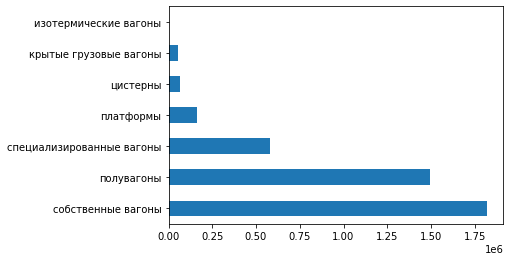

In [136]:
data['cargo_type'].value_counts().plot.barh()

In [137]:
data['loaded'].value_counts()

1.0    1289908
2.0    1254007
0.0          1
Name: loaded, dtype: int64

In [138]:
dt = data[data['danger'].isna() != True]

In [139]:
dt.groupby('cargo_type')['danger'].sum().sort_values(ascending=False)

cargo_type
собственные вагоны           90821.0
цистерны                     15063.0
специализированные вагоны     3403.0
полувагоны                    1329.0
крытые грузовые вагоны        1001.0
платформы                      369.0
Name: danger, dtype: float64

In [140]:
data

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,operation_st_esr,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto,cargo_type
0,NaN,NaN,62827035,984700.0,NaN,NaN,NaN,2.0,81.0,2020-07-16 03:40:00,984502.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны
1,NaN,1.0,62827035,862201.0,20.0,NaN,421034.0,NaN,18.0,2020-07-16 14:10:00,984700.0,2.002026e+09,NaN,93149858.0,60.0,NaN,68398528.0,NaN,NaN,249.0,NaN,полувагоны
2,NaN,NaN,62827316,863007.0,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:50:00,863007.0,2.001933e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны
3,NaN,NaN,62827381,862108.0,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:16:00,862108.0,2.001931e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны
4,NaN,1.0,62845730,887904.0,20.0,NaN,421034.0,NaN,19.0,2020-07-16 15:15:00,967808.0,2.000039e+09,NaN,81195103.0,60.0,NaN,52682351.0,NaN,NaN,248.0,NaN,полувагоны
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189910,8.600099e+14,1.0,62827548,76404.0,NaN,NaN,161185.0,1.0,4.0,2020-07-16 03:29:00,860009.0,2.001933e+09,5.0,39513543.0,60.0,10.0,76900054.0,860009.0,2.001933e+09,NaN,6256.0,полувагоны
4189911,8.600099e+14,1.0,62827548,76404.0,NaN,NaN,161185.0,1.0,4.0,2020-07-16 03:30:00,860009.0,2.001933e+09,5.0,39513543.0,60.0,10.0,76900054.0,860009.0,2.001933e+09,NaN,6256.0,полувагоны
4189912,8.302009e+14,NaN,62827910,862201.0,NaN,NaN,NaN,2.0,3.0,2020-07-15 20:00:00,862201.0,2.001931e+09,4.0,NaN,60.0,10.0,NaN,862201.0,2.001931e+09,NaN,1756.0,полувагоны
4189913,NaN,NaN,62827514,968302.0,NaN,NaN,NaN,1.0,80.0,2020-07-16 02:37:00,968302.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны


In [141]:
len(data['destination_esr'].unique())

1973

In [142]:
data['destination_esr'].value_counts()

986103.0    231212
967808.0    169664
984700.0     72706
932207.0     69380
863007.0     69153
             ...  
582607.0         1
971729.0         1
38703.0          1
289800.0         1
538604.0         1
Name: destination_esr, Length: 1972, dtype: int64

In [143]:
from bs4 import BeautifulSoup    
import requests 
import json

In [144]:
def station_identifier(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')  
    all_blocks = soup.find_all('div', class_='template')[0].find_all('div', class_='pRailway_block')
    stat_vocab = {}
    for char in all_blocks:
        block = char.find_all('a', class_='pRailway_item jFastSearch_key')
        for cell in block:
            station = cell.text 
            start_str = str(cell).find('fastSearch-')
            if start_str != -1:
                number = str(cell)[103:109].replace('"','')
                stat_vocab[number] = station
            else:
                pass
    return stat_vocab

In [145]:
response = requests.get('https://www.alta.ru/railway/')
soup = BeautifulSoup(response.text, 'html.parser')  
lines = soup.find_all('div', class_='pRailway_block')[0].find_all('a', class_='pRailway_item')

road_line, vocabs = [], []
for item in lines:
    start = str(item).find('href=')+6
    end = str(item).find('">')
    line = str(item)[start:end]
    url = 'https://www.alta.ru'+line
    result = station_identifier(url)
    vocabs.append(result)
    road_line.append(item.text)

In [146]:
super_dict = {}
for d in vocabs:
    for k, v in d.items():  
        super_dict.setdefault(k, []).append(v)
        
data['destination_esr'].fillna(0, inplace=True)
data['destination_esr'] = data['destination_esr'].astype(int)
data['destination_esr'].fillna(0, inplace=True)
data['destination_esr'] = [int(str(i)[0:5]) for i in data['destination_esr']]

st = pd.DataFrame(super_dict.items(), columns=['destination_esr', 'station_name'])
st['station_name'] = [i[0] for i in st['station_name']]
st['destination_esr'] = st['destination_esr'].astype(int)

result_data = pd.merge(data, st, how='left', on=['destination_esr'])

In [147]:
result_data

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,operation_st_esr,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto,cargo_type,station_name
0,NaN,NaN,62827035,98470,NaN,NaN,NaN,2.0,81.0,2020-07-16 03:40:00,984502.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Находка (эксп.)
1,NaN,1.0,62827035,86220,20.0,NaN,421034.0,NaN,18.0,2020-07-16 14:10:00,984700.0,2.002026e+09,NaN,93149858.0,60.0,NaN,68398528.0,NaN,NaN,249.0,NaN,полувагоны,Мереть
2,NaN,NaN,62827316,86300,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:50:00,863007.0,2.001933e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Ерунаково
3,NaN,NaN,62827381,86210,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:16:00,862108.0,2.001931e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Терентьевская
4,NaN,1.0,62845730,88790,20.0,NaN,421034.0,NaN,19.0,2020-07-16 15:15:00,967808.0,2.000039e+09,NaN,81195103.0,60.0,NaN,52682351.0,NaN,NaN,248.0,NaN,полувагоны,Черногорские Копи
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189910,8.600099e+14,1.0,62827548,76404,NaN,NaN,161185.0,1.0,4.0,2020-07-16 03:29:00,860009.0,2.001933e+09,5.0,39513543.0,60.0,10.0,76900054.0,860009.0,2.001933e+09,NaN,6256.0,полувагоны,NaN
4189911,8.600099e+14,1.0,62827548,76404,NaN,NaN,161185.0,1.0,4.0,2020-07-16 03:30:00,860009.0,2.001933e+09,5.0,39513543.0,60.0,10.0,76900054.0,860009.0,2.001933e+09,NaN,6256.0,полувагоны,NaN
4189912,8.302009e+14,NaN,62827910,86220,NaN,NaN,NaN,2.0,3.0,2020-07-15 20:00:00,862201.0,2.001931e+09,4.0,NaN,60.0,10.0,NaN,862201.0,2.001931e+09,NaN,1756.0,полувагоны,Мереть
4189913,NaN,NaN,62827514,96830,NaN,NaN,NaN,1.0,80.0,2020-07-16 02:37:00,968302.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Десна


In [148]:
data = result_data[result_data['station_name'].isna() != True]
data

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,operation_st_esr,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto,cargo_type,station_name
0,NaN,NaN,62827035,98470,NaN,NaN,NaN,2.0,81.0,2020-07-16 03:40:00,984502.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Находка (эксп.)
1,NaN,1.0,62827035,86220,20.0,NaN,421034.0,NaN,18.0,2020-07-16 14:10:00,984700.0,2.002026e+09,NaN,93149858.0,60.0,NaN,68398528.0,NaN,NaN,249.0,NaN,полувагоны,Мереть
2,NaN,NaN,62827316,86300,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:50:00,863007.0,2.001933e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Ерунаково
3,NaN,NaN,62827381,86210,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:16:00,862108.0,2.001931e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Терентьевская
4,NaN,1.0,62845730,88790,20.0,NaN,421034.0,NaN,19.0,2020-07-16 15:15:00,967808.0,2.000039e+09,NaN,81195103.0,60.0,NaN,52682351.0,NaN,NaN,248.0,NaN,полувагоны,Черногорские Копи
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189908,NaN,NaN,62813522,88760,NaN,NaN,NaN,2.0,80.0,2020-07-16 08:35:00,887603.0,2.000036e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Камышта
4189909,9.683023e+14,1.0,62827514,86220,NaN,NaN,161128.0,2.0,4.0,2020-07-16 12:10:00,968302.0,2.000039e+09,5.0,93149858.0,60.0,72.0,68398528.0,968209.0,2.000039e+09,NaN,243.0,полувагоны,Мереть
4189912,8.302009e+14,NaN,62827910,86220,NaN,NaN,NaN,2.0,3.0,2020-07-15 20:00:00,862201.0,2.001931e+09,4.0,NaN,60.0,10.0,NaN,862201.0,2.001931e+09,NaN,1756.0,полувагоны,Мереть
4189913,NaN,NaN,62827514,96830,NaN,NaN,NaN,1.0,80.0,2020-07-16 02:37:00,968302.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Десна


In [149]:
!pip install geopandas
!pip install geopy
!pip install folium

  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
  Using cached pyproj-3.0.1-cp38-cp38-win_amd64.whl (14.5 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\User\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-q0zbqk36\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-q0zbqk36\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\User\AppData\Local\Temp\pip-pip-egg-info-hw4xtoxn'
         cwd: C:\Users\User\AppData\Local\Temp\pip-install-q0zbqk36\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [150]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import folium  
import tqdm

In [151]:
locator = Nominatim(user_agent='myGeocoder')
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.5)

In [152]:
stantions = list(data['station_name'].unique())

stations = []
latitude_stantion = []
longitude_stantion = []
for i in stantions:
    station = i.replace('(эксп.)','').replace('(перев.)','').replace('(рзд)','').replace('(эксп.в КЖД)','').strip()
    station = station.replace('Суховская-Южная','Суховская').replace('Коршуниха-Ангарская','Коршуниха')
    station = station.replace('Ежевая','Ежёвая').replace('Чистоозерная','Чистоозёрная')
    station = station.replace('Анзеби','Анзёби').replace('Кемерово-Сортировочное','Кемерово')
    station = station.replace('Китой-Комбинатская','Китой').replace('Кемерово-Сортировочное','Кемерово')
    station = station.replace('Наушки (экс.АО:С-Баатар-У-Баатар(иск))','Наушки')
    station = station.replace('Наушки (эксп.АО:У-Баатар(вкл) и далее)','Наушки')
    station = station.replace('Первая Речка (дизельное топливо)','Первая Речка')
    station = station.replace('Первая Речка (слив светлый)','Первая Речка')
    station = station.replace('Чульбас','Чулбасс').replace('Вышестеблиевская (налив,эксп.)','Вышестеблиевская')
    station = station.replace('Нижний Новгород-Автозавод','Нижний Новгород')
    station = station.replace('Нерюнгри-Грузовая Якутские ж.д.','Нерюнгри-Грузовая')
    station = station.replace('Обг.пункт N 201','обгонный пункт № 201')
    station = station.replace('Уланмакит','Улан-Макит')
    station = station.replace('Первая Речка (слив темный)','Первая Речка')
    station = station.replace('Богашево','Богашёво').replace('Пугачевск','Пугачёвск')
    station = station.replace('Наушки (эксп.в ДСВН)','Наушки')
    station = station.replace('Бирюлево-Товарная','Бирюлёво-Товарная')
    station = station.replace('Кавказ (паром,эксп.на Варну)','Порт Кавказ')
    location = locator.geocode(station)
    try:
        latitude_stantion.append(location.latitude)
        longitude_stantion.append(location.longitude)
        stations.append(i)
    except:
        print(station)

In [153]:
dt = pd.DataFrame()
dt['station_name'] = stations
dt['stat_lat'] = latitude_stantion
dt['stat_long'] = longitude_stantion
dt

,station_name,stat_lat,stat_long
0,Находка (эксп.),42.824649,132.892600
1,Мереть,54.592380,86.353775
2,Ерунаково,54.082523,87.453751
3,Терентьевская,54.066822,86.868286
4,Черногорские Копи,53.823788,91.291817
...,...,...,...
1534,Багратионовск,54.386819,20.640512
1535,Биракан,48.992799,131.719999
1536,Белгород-Сумской,50.588078,36.574909
1537,Дормидонтовка,47.770195,134.907562


In [154]:
result_data = pd.merge(data, dt, how='left', on=['station_name'])

In [155]:
result_data

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,operation_st_esr,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto,cargo_type,station_name,stat_lat,stat_long
0,NaN,NaN,62827035,98470,NaN,NaN,NaN,2.0,81.0,2020-07-16 03:40:00,984502.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Находка (эксп.),42.824649,132.892600
1,NaN,1.0,62827035,86220,20.0,NaN,421034.0,NaN,18.0,2020-07-16 14:10:00,984700.0,2.002026e+09,NaN,93149858.0,60.0,NaN,68398528.0,NaN,NaN,249.0,NaN,полувагоны,Мереть,54.592380,86.353775
2,NaN,NaN,62827316,86300,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:50:00,863007.0,2.001933e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Ерунаково,54.082523,87.453751
3,NaN,NaN,62827381,86210,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:16:00,862108.0,2.001931e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Терентьевская,54.066822,86.868286
4,NaN,1.0,62845730,88790,20.0,NaN,421034.0,NaN,19.0,2020-07-16 15:15:00,967808.0,2.000039e+09,NaN,81195103.0,60.0,NaN,52682351.0,NaN,NaN,248.0,NaN,полувагоны,Черногорские Копи,53.823788,91.291817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910711,NaN,NaN,62813522,88760,NaN,NaN,NaN,2.0,80.0,2020-07-16 08:35:00,887603.0,2.000036e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Камышта,53.549336,90.454171
3910712,9.683023e+14,1.0,62827514,86220,NaN,NaN,161128.0,2.0,4.0,2020-07-16 12:10:00,968302.0,2.000039e+09,5.0,93149858.0,60.0,72.0,68398528.0,968209.0,2.000039e+09,NaN,243.0,полувагоны,Мереть,54.592380,86.353775
3910713,8.302009e+14,NaN,62827910,86220,NaN,NaN,NaN,2.0,3.0,2020-07-15 20:00:00,862201.0,2.001931e+09,4.0,NaN,60.0,10.0,NaN,862201.0,2.001931e+09,NaN,1756.0,полувагоны,Мереть,54.592380,86.353775
3910714,NaN,NaN,62827514,96830,NaN,NaN,NaN,1.0,80.0,2020-07-16 02:37:00,968302.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Десна,49.284405,28.539983


In [156]:
def vaizualize_map(data, col_lat, col_long, ref_coord_long, ref_coord_lat):
    map1 = folium.Map(location=[ref_coord_lat, ref_coord_long],
                        zoom_start=12,
                        tiles='cartodbpositron')

    data.apply(lambda row:folium.CircleMarker(location=[row[col_lat], 
                                                        row[col_long]]).add_to(map1), axis=1)
    return map1

In [157]:
vaizualize_map(dt, 'stat_lat', 'stat_long', 32.85615, 67.92650)

In [159]:
def loader_data(road_line, vocab):
    line = []
    df = pd.DataFrame()
    for i in range(len(vocab)):
        line.append(road_line)
    df['line'] = line
    df['station_name'] = vocab
    return df

In [160]:
ds = loader_data(road_line[0], list(vocabs[0].values()))
for i in range(1,len(road_line)):
    dff = loader_data(road_line[i], list(vocabs[i].values()))
    ds = ds.append(dff)

In [161]:
ds

,line,station_name
0,Восточно-Сибирская железная дорога,Азей
1,Восточно-Сибирская железная дорога,Акульшет
2,Восточно-Сибирская железная дорога,Алгашет
3,Восточно-Сибирская железная дорога,Алзамай
4,Восточно-Сибирская железная дорога,Ангаракан (рзд)
...,...,...
11,Якутская железная дорога,Рассолода
12,Якутская железная дорога,Тенистый (рзд)
13,Якутская железная дорога,Томмот
14,Якутская железная дорога,Чульбас (рзд)


In [162]:
result_data = pd.merge(result_data, ds, how='left', on=['station_name'])

In [163]:
result_data

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,operation_st_esr,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto,cargo_type,station_name,stat_lat,stat_long,line
0,NaN,NaN,62827035,98470,NaN,NaN,NaN,2.0,81.0,2020-07-16 03:40:00,984502.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Находка (эксп.),42.824649,132.892600,Дальневосточная железная дорога
1,NaN,1.0,62827035,86220,20.0,NaN,421034.0,NaN,18.0,2020-07-16 14:10:00,984700.0,2.002026e+09,NaN,93149858.0,60.0,NaN,68398528.0,NaN,NaN,249.0,NaN,полувагоны,Мереть,54.592380,86.353775,Западно-Сибирская железная дорога
2,NaN,NaN,62827316,86300,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:50:00,863007.0,2.001933e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Ерунаково,54.082523,87.453751,Западно-Сибирская железная дорога
3,NaN,NaN,62827381,86210,NaN,NaN,NaN,2.0,80.0,2020-07-16 14:16:00,862108.0,2.001931e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Терентьевская,54.066822,86.868286,Западно-Сибирская железная дорога
4,NaN,1.0,62845730,88790,20.0,NaN,421034.0,NaN,19.0,2020-07-16 15:15:00,967808.0,2.000039e+09,NaN,81195103.0,60.0,NaN,52682351.0,NaN,NaN,248.0,NaN,полувагоны,Черногорские Копи,53.823788,91.291817,Красноярская железная дорога
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912055,NaN,NaN,62813522,88760,NaN,NaN,NaN,2.0,80.0,2020-07-16 08:35:00,887603.0,2.000036e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Камышта,53.549336,90.454171,Красноярская железная дорога
3912056,9.683023e+14,1.0,62827514,86220,NaN,NaN,161128.0,2.0,4.0,2020-07-16 12:10:00,968302.0,2.000039e+09,5.0,93149858.0,60.0,72.0,68398528.0,968209.0,2.000039e+09,NaN,243.0,полувагоны,Мереть,54.592380,86.353775,Западно-Сибирская железная дорога
3912057,8.302009e+14,NaN,62827910,86220,NaN,NaN,NaN,2.0,3.0,2020-07-15 20:00:00,862201.0,2.001931e+09,4.0,NaN,60.0,10.0,NaN,862201.0,2.001931e+09,NaN,1756.0,полувагоны,Мереть,54.592380,86.353775,Западно-Сибирская железная дорога
3912058,NaN,NaN,62827514,96830,NaN,NaN,NaN,1.0,80.0,2020-07-16 02:37:00,968302.0,2.000039e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,полувагоны,Десна,49.284405,28.539983,Дальневосточная железная дорога


<AxesSubplot:>

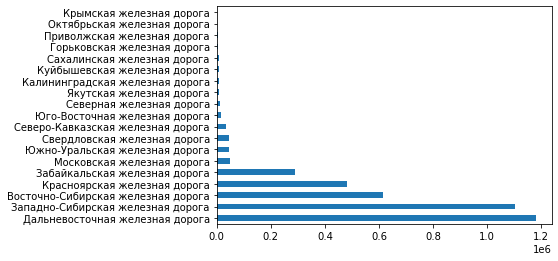

In [164]:
result_data['line'].value_counts().plot.barh()

In [165]:
result_data.to_csv('RZD.csv', sep='\t', encoding='utf-8' ,header='true',index=False)